Accuracy: 0.195
Precision: 0.19245053684043867
Recall: 0.1955301903920524
Classification Report:
                   precision    recall  f1-score   support

          Allergy       0.17      0.14      0.16        28
             Cold       0.10      0.08      0.09        36
              Flu       0.18      0.26      0.21        31
         Migraine       0.23      0.27      0.25        33
        Sinusitis       0.21      0.21      0.21        29
Stomach Infection       0.26      0.21      0.23        43

         accuracy                           0.20       200
        macro avg       0.19      0.20      0.19       200
     weighted avg       0.19      0.20      0.19       200



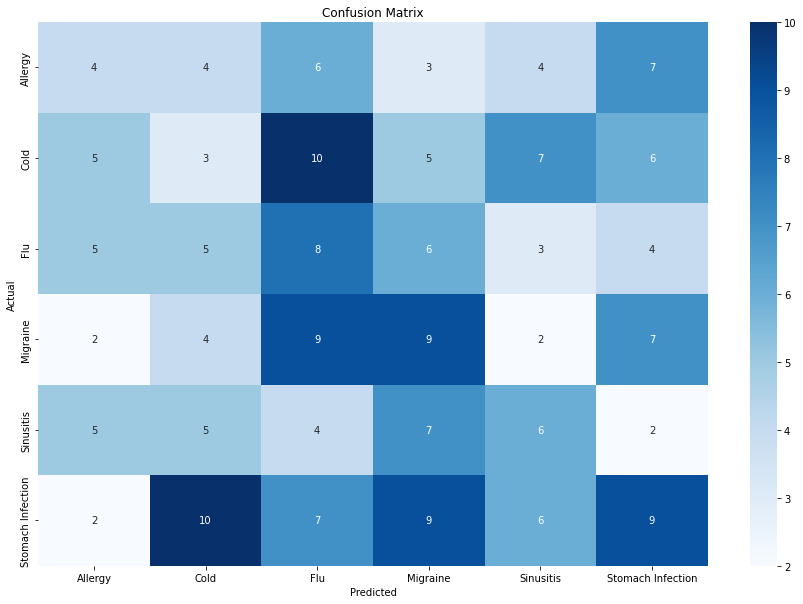

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset = 'health_disorders_large.csv'
df = pd.read_csv(dataset)

# Preprocess the dataset
# Convert categorical variables to numerical values
le = LabelEncoder()
for column in df.columns[:-1]:
    df[column] = le.fit_transform(df[column])

# Encode the target variable
df['disorder'] = le.fit_transform(df['disorder'])

# Split the dataset into features and target variable
X = df.drop('disorder', axis=1)
y = df['disorder']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=le.inverse_transform(range(len(le.classes_)))))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.inverse_transform(range(len(le.classes_))), yticklabels=le.inverse_transform(range(len(le.classes_))))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
